In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We will be working with a CSV file , with different features or X values and a corresponding Y value 
We will see how the features are correlated with the Y value and find their regression coefficints 
Then we will train and test the Linear Regression model in order to predict some Y value for given set of X features
We will also calculate errors in our estimation 

In [2]:
# reading in our data file 

In [3]:
df=pd.read_csv('DATA.csv')

Lets see how the data looks like and try to get some general information about it 

In [4]:
df.head()

,Unnamed: 0,FeatureX1,FeatureX2,FeatureX3,Y
0,0,230.1,37.8,69.2,22.1
1,1,44.5,39.3,45.1,10.4
2,2,17.2,45.9,69.3,9.3
3,3,151.5,41.3,58.5,18.5
4,4,180.8,10.8,58.4,12.9


In [5]:
df

,Unnamed: 0,FeatureX1,FeatureX2,FeatureX3,Y
0,0,230.1,37.8,69.2,22.1
1,1,44.5,39.3,45.1,10.4
2,2,17.2,45.9,69.3,9.3
3,3,151.5,41.3,58.5,18.5
4,4,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,195,38.2,3.7,13.8,7.6
196,196,94.2,4.9,8.1,9.7
197,197,177.0,9.3,6.4,12.8
198,198,283.6,42.0,66.2,25.5


In [6]:
#We can see there were some default indexes present in our data, lets drop them 

In [42]:
df=pd.read_csv('DATA.csv', index_col=[0])
df

,FeatureX1,FeatureX2,FeatureX3,Y
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [43]:
df.head()

,FeatureX1,FeatureX2,FeatureX3,Y
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


We will now get some statistical information about the data

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FeatureX1  200 non-null    float64
 1   FeatureX2  200 non-null    float64
 2   FeatureX3  200 non-null    float64
 3   Y          200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


The data does not contain any null-values and all data are numeric (float) 

In [45]:
df.describe()

,FeatureX1,FeatureX2,FeatureX3,Y
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [46]:
#Lets visualise how Y varies with  these individual Features using Seaborn and Matplotlib 

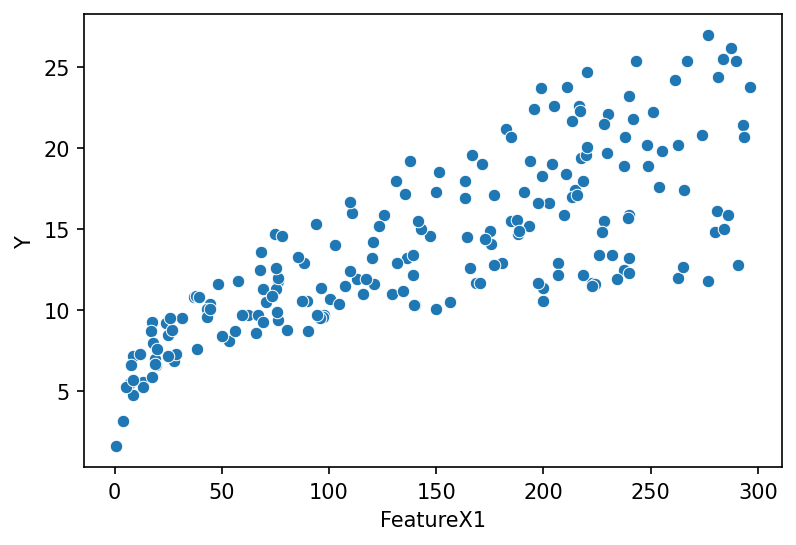

In [47]:
plt.figure(figsize=(6,4),dpi=150)
sns.scatterplot(data=df,x='FeatureX1',y='Y')

In [48]:
#Plot of FeatureX1 vs Y

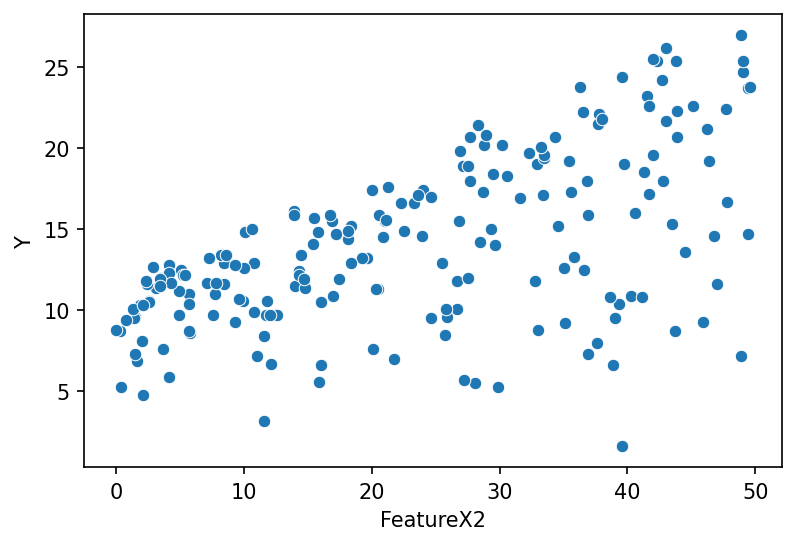

In [49]:
plt.figure(figsize=(6,4),dpi=150)
sns.scatterplot(data=df,x='FeatureX2',y='Y')

In [50]:
#Plot of FeatureX2 vs Y

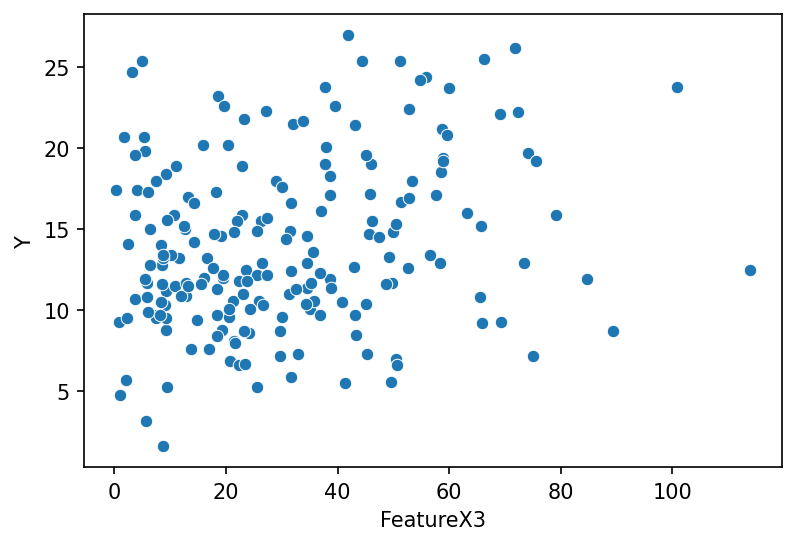

In [51]:
plt.figure(figsize=(6,4),dpi=150)
sns.scatterplot(data=df,x='FeatureX3',y='Y')

In [52]:
#Plot of FeatureX3 vs Y

 Note that from the plot of FeatureX3 vs Y doesn't  we can notice that FeatureX3 does not have much impact on Y .
 

In [53]:
#Now we will use corr() to get some correlation information about the data

In [54]:
df.corr()

,FeatureX1,FeatureX2,FeatureX3,Y
FeatureX1,1.000000,0.054809,0.056648,0.782224
FeatureX2,0.054809,1.000000,0.354104,0.576223
FeatureX3,0.056648,0.354104,1.000000,0.228299
Y,0.782224,0.576223,0.228299,1.000000


In [55]:
df.corr().transpose()

,FeatureX1,FeatureX2,FeatureX3,Y
FeatureX1,1.000000,0.054809,0.056648,0.782224
FeatureX2,0.054809,1.000000,0.354104,0.576223
FeatureX3,0.056648,0.354104,1.000000,0.228299
Y,0.782224,0.576223,0.228299,1.000000


In [56]:
# Now we can have a fair idea how different Features are correlated with Y 
#Ignore the diagonal 1.0000 , it just shows self correlation 

Now we have a fair idea of our dataset 
We dont have any null values , i.e data was clean
We know about the columns
We also got statistical information of the data

Now we will dive into the Regression part ...

First we separate the Features and Values 

In [57]:
X=df.drop('Y',axis=1)

In [58]:
y=df['Y']

In [59]:
X

,FeatureX1,FeatureX2,FeatureX3
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [60]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Y, Length: 200, dtype: float64

In [61]:
#We have now separated the data 

In [62]:
#Now we will use Scikit-Learn's train_test_split to split our data into training set and test set

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

The total dataset was split into training and test sets in the ratio 70% to 30%
This is specified in the test_size parameter , the random_state is used to refer to this particular split of the set

#   

lets see how the data was split and find the shape of X_train and X_test

In [65]:
X_train.shape

(140, 3)

In [67]:
X_test.shape

(60, 3)

In [68]:
#Hence they have been split in 70-30 ratio 

Now we will scale the data i.e (x-x(mean))/std. deviation
This is basically Standardization of the Features
 If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler=StandardScaler()

In [71]:
scaler.fit(X_train)

StandardScaler()

In [72]:
X_train=scaler.transform(X_train)

In [73]:
X_test=scaler.transform(X_test)

Note we never fit on the test data .You always want to make sure your model is not over-fitted, meaning it will still perform well for unseen data. That's why you should always train your model on a subset of the full dataset (the training dataset), and use the testing set to assess the model performances.

#  


Now we will use Ridge Regression model of Scikit Learn

In [74]:
from sklearn.linear_model import Ridge

We will use Metrics to check our estimation results . We will use Mean Squared Error for this project 

In [75]:
from sklearn.metrics import mean_squared_error

In [76]:
max=99999999999999
j=0

We will use a loop that will use different values of alpha parameter of the Ridge model

Here, α (alpha) is the parameter which balances the amount of emphasis given to minimizing Residual Sum of Squares vs minimizing sum of square of coefficients. α can take various values

In [80]:
for i in range(1,100000):
    
    my_modelx=Ridge(alpha=i)
    
    my_modelx.fit(X_train,y_train)
    y_pred2=my_modelx.predict(X_test)
    mse2=mean_squared_error(y_pred2,y_test)
    if(mse2<max):
        max=mse2
        j=i


In [82]:
j


1

In [83]:
max

2.3190215794287514

Thus we see an alpha value of 1 gives the minimum mean squared error of 2.3190 

Now we will create our final model with alpha=1

In [85]:
final_model=Ridge(alpha=1)

In [88]:
final_model.coef_

array([3.73961770e+00, 2.74477719e+00, 2.68837098e-03])

These are the final regression beta coefficients using Ridge Regression 
Note FeatureX3 has a very small value almost zero as compared to the other two

Now lets see how our model performed with respect to the y_test graphically

In [101]:
final_model.fit(X,y)
yhat=final_model.predict(X)

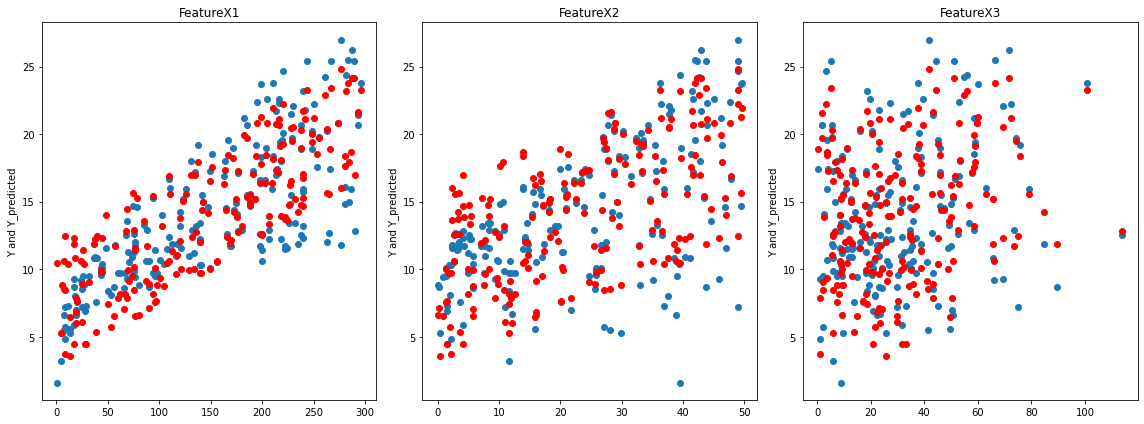

In [104]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(16,6))
axes[0].plot(X['FeatureX1'],y,'o')
axes[0].plot(X['FeatureX1'],yhat,'o',color='red')
axes[0].set_ylabel("Y and Y_predicted")
axes[0].set_title("FeatureX1")

axes[1].plot(X['FeatureX2'],y,'o')
axes[1].plot(X['FeatureX2'],yhat,'o',color='red')
axes[1].set_ylabel("Y and Y_predicted")
axes[1].set_title("FeatureX2")

axes[2].plot(X['FeatureX3'],y,'o')
axes[2].plot(X['FeatureX3'],yhat,'o',color='red')
axes[2].set_ylabel("Y and Y_predicted")
axes[2].set_title("FeatureX3")

plt.tight_layout();

The blue points show the actual Y in the test set and red points show the Y_predicted 


Now we save this model 

#  









In [105]:
from joblib import dump,load

In [106]:
dump(final_model,'Features3Predictor.joblib')

['Features3Predictor.joblib']

We can later load this model from joblib as ;

model=load('Features3Predictor.joblib')

